**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
FOLDER_ANT  = "KS91_K562_ASTARRseq_peak_macs_input"
FOLDER_LOOP = "hic_intact_deep"

### Network

In [3]:
fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
fname = "network_ocr_metric_node.csv"
fpath = file.path(fdiry, fname)

dat = read_csv(fpath)

dat_network_ocr_metric_node = dat
print(dim(dat))
head(dat)

Rows: 49673 Columns: 18
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): name, shared name
dbl (14): AverageShortestPathLength, BetweennessCentrality, ClosenessCentral...
lgl  (2): IsSingleNode, selected

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 49673    18


AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>
10.48712,4.919747e-01,0.09535502,0.1000000,5,19,FALSE,chr10:100045961-100046653,3.80,0,5,0,0.3675250,FALSE,0,chr10:100045961-100046653,839830,0.2285714
10.86052,2.724630e-02,0.09207666,0.1666667,4,20,FALSE,chr10:100433434-100434444,4.50,0,4,0,0.3426323,FALSE,0,chr10:100433434-100434444,33716,0.3333333
11.78541,4.614888e-05,0.08485069,0.3333333,3,26,FALSE,chr10:100185017-100187275,3.00,0,3,0,0.2809728,FALSE,0,chr10:100185017-100187275,12,0.5333333
11.78112,1.282016e-02,0.08488160,0.3333333,3,26,FALSE,chr10:100267066-100268374,3.00,0,3,0,0.2812589,FALSE,0,chr10:100267066-100268374,7662,0.4444444
10.81330,2.118233e-03,0.09247867,0.0000000,2,25,FALSE,chr10:100370571-100371646,7.50,0,2,0,0.3457797,FALSE,0,chr10:100370571-100371646,2546,0.5416667
10.80043,2.335595e-02,0.09258891,0.1666667,4,25,FALSE,chr10:100373060-100374238,4.75,0,4,0,0.3466381,FALSE,0,chr10:100373060-100374238,15290,0.3035714


## Enhancer peaks

In [4]:
fdiry = file.path(FD_RES, "results", "region", FOLDER_ANT, "summary")
#fname = "network_ocr_metric_node.csv"
#fpath = file.path(fdiry, fname)
for (fname in dir(fdiry)){print(fname)}

[1] "peak.summary.ccre_v3.tsv"
[1] "peak.summary.ccre_v4.tsv"
[1] "peak.summary.chipseq_histone.tsv"
[1] "peak.summary.chipseq_tf_subset.tsv"
[1] "peak.summary.chromHMM.tsv"
[1] "peak.summary.crispri_growth_dhs.tsv"
[1] "peak.summary.crispri_hcrff_casa.tsv"
[1] "peak.summary.enhancer_zscore_junke.ASTARR_A.tsv"
[1] "peak.summary.enhancer_zscore_junke.ASTARR_AB.tsv"
[1] "peak.summary.enhancer_zscore_junke.ASTARR_R.tsv"
[1] "peak.summary.enhancer_zscore_junke.ASTARR.tsv"
[1] "peak.summary.enhancer_zscore_junke.LMPRA_A.tsv"
[1] "peak.summary.enhancer_zscore_junke.LMPRA_AB.tsv"
[1] "peak.summary.enhancer_zscore_junke.LMPRA_R.tsv"
[1] "peak.summary.enhancer_zscore_junke.LMPRA.tsv"
[1] "peak.summary.enhancer_zscore_junke.STARRMPRA.tsv"
[1] "peak.summary.enhancer_zscore_junke.TMPRA_A.tsv"
[1] "peak.summary.enhancer_zscore_junke.TMPRA_R.tsv"
[1] "peak.summary.enhancer_zscore_junke.TMPRA.tsv"
[1] "peak.summary.enhancer_zscore_junke.WSTARR_A.tsv"
[1] "peak.summary.enhancer_zscore_junke.WSTARR_AB.

In [14]:
###
vec    = c()

###
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT, "summary")
fname  = "*enhancer_zscore_junke*_A*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
vec    = c(vec, fpaths)

###
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT, "summary")
fname  = "*crispri*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
vec    = c(vec, fpaths)

###
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT, "summary")
fname  = "*tss*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
vec    = c(vec, fpaths)

###
fpaths = vec
fnames = basename(vec)
for (fname in fnames){print(fname)}

[1] "peak.summary.enhancer_zscore_junke.ASTARR_AB.tsv"
[1] "peak.summary.enhancer_zscore_junke.ASTARR_A.tsv"
[1] "peak.summary.enhancer_zscore_junke.LMPRA_AB.tsv"
[1] "peak.summary.enhancer_zscore_junke.LMPRA_A.tsv"
[1] "peak.summary.enhancer_zscore_junke.TMPRA_A.tsv"
[1] "peak.summary.enhancer_zscore_junke.WSTARR_AB.tsv"
[1] "peak.summary.enhancer_zscore_junke.WSTARR_A.tsv"
[1] "peak.summary.crispri_growth_dhs.tsv"
[1] "peak.summary.crispri_hcrff_casa.tsv"
[1] "peak.summary.tss_pol2.tsv"


In [17]:
lst = lapply(fpaths, function(fpath){
    dat = read_tsv(fpath, show_col_types = FALSE)
    return(dat)
})

dat = bind_rows(lst)

###
dat_peak_annot = dat
print(dim(dat))
head(dat)

[1] 128726      7


Peak,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1:1012902-1014502,Enhancer_ZScore,ASTARR_AB,1,chr1:1013020-1013470,2.181596,ASTARR_AB
chr1:1723926-1724986,Enhancer_ZScore,ASTARR_AB,1,chr1:1724540-1724700,2.154374,ASTARR_AB
chr1:2289710-2291474,Enhancer_ZScore,ASTARR_AB,1,chr1:2290700-2291030,2.388582,ASTARR_AB
chr1:3312817-3313807,Enhancer_ZScore,ASTARR_AB,1,chr1:3313260-3313400,2.179446,ASTARR_AB
chr1:5855596-5857313,Enhancer_ZScore,ASTARR_AB,1,chr1:5856530-5856630,1.996532,ASTARR_AB
chr1:5917163-5918204,Enhancer_ZScore,ASTARR_AB,1,chr1:5917710-5917930,2.169290,ASTARR_AB


In [28]:
dat = dat_network_ocr_metric_node

vec = c(0,1,2,3,5,40)
txt = paste0("Q", 1:(length(vec)-1))
dat = dat %>% 
    dplyr::mutate(Peak = name) %>%
    dplyr::select(Peak, Degree, BetweennessCentrality) %>%
    dplyr::mutate(Group=cut(Degree, breaks = vec, labels = txt))

dat_node = dat
print(table(dat$Group))
print(dim(dat))
head(dat)


   Q1    Q2    Q3    Q4    Q5 
15197 10085  7009  8468  8914 
[1] 49673     4


Peak,Degree,BetweennessCentrality,Group
<chr>,<dbl>,<dbl>,<fct>
chr10:100045961-100046653,5,4.919747e-01,Q4
chr10:100433434-100434444,4,2.724630e-02,Q4
chr10:100185017-100187275,3,4.614888e-05,Q3
chr10:100267066-100268374,3,1.282016e-02,Q3
chr10:100370571-100371646,2,2.118233e-03,Q2
chr10:100373060-100374238,4,2.335595e-02,Q4


In [29]:
dat = dat_peak_annot
dat = left_join(dat, dat_node, by="Peak")
dat = dat %>% na.omit
head(dat)

Peak,Annotation,Label,Count,Region,Score,Note,Degree,BetweennessCentrality,Group
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
chr1:1723926-1724986,Enhancer_ZScore,ASTARR_AB,1,chr1:1724540-1724700,2.154374,ASTARR_AB,6,0.00628965,Q5
chr1:2289710-2291474,Enhancer_ZScore,ASTARR_AB,1,chr1:2290700-2291030,2.388582,ASTARR_AB,2,1.00000000,Q2
chr1:5917163-5918204,Enhancer_ZScore,ASTARR_AB,1,chr1:5917710-5917930,2.169290,ASTARR_AB,7,0.04863118,Q5
chr1:8873665-8874040,Enhancer_ZScore,ASTARR_AB,1,chr1:8873640-8873890,2.298765,ASTARR_AB,1,0.00000000,Q1
chr1:8877894-8879515,Enhancer_ZScore,ASTARR_AB,1,chr1:8877970-8878130,2.326479,ASTARR_AB,7,0.51785487,Q5
chr1:8899628-8901001,Enhancer_ZScore,ASTARR_AB,1,chr1:8900040-8900240,2.214467,ASTARR_AB,3,0.04726523,Q3


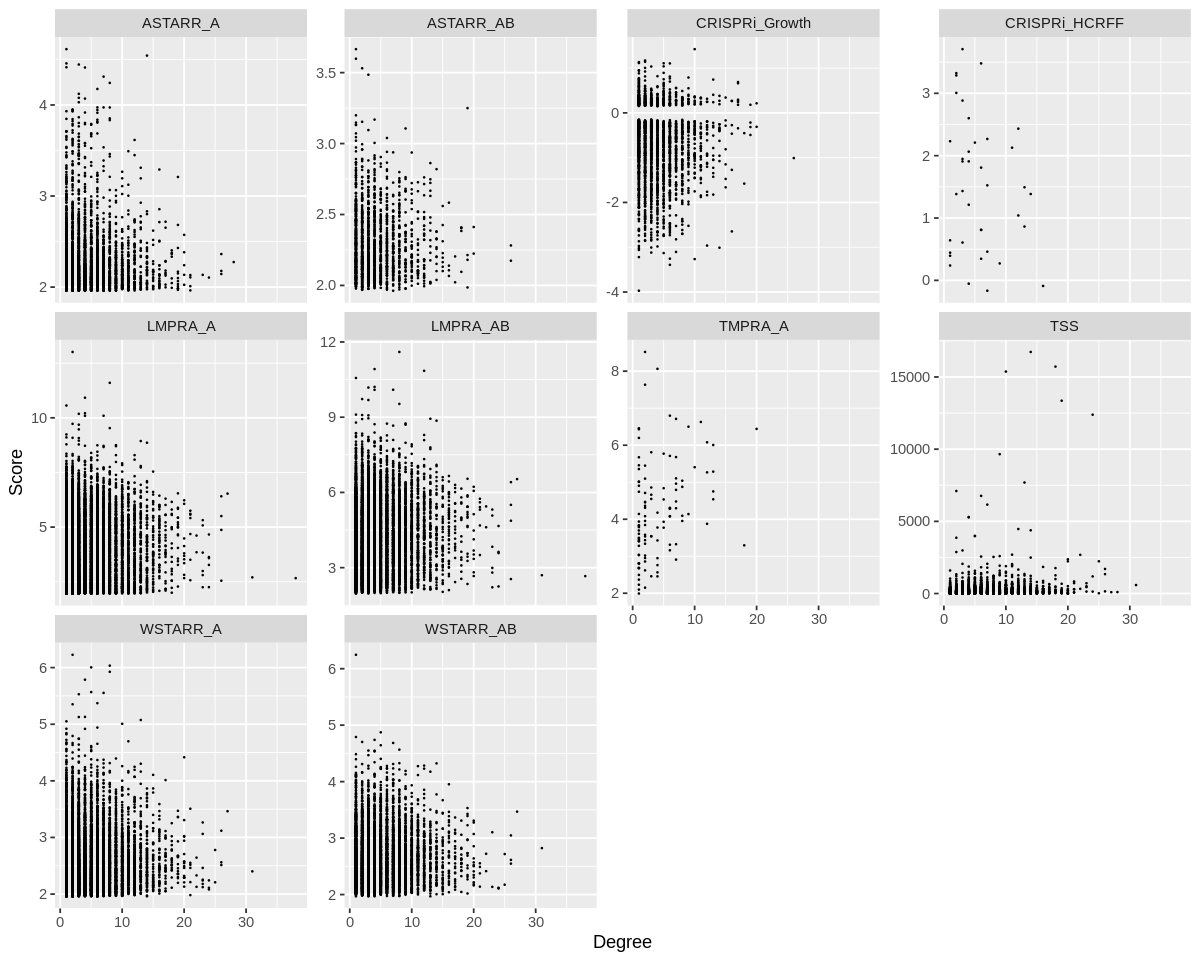

In [30]:
gpt = ggplot(dat, aes(x=Degree, y=Score)) + 
    geom_point(size=0.1) +
    facet_wrap(~Label, scales = "free_y")
options(repr.plot.height=8, repr.plot.width=10)
print(gpt)

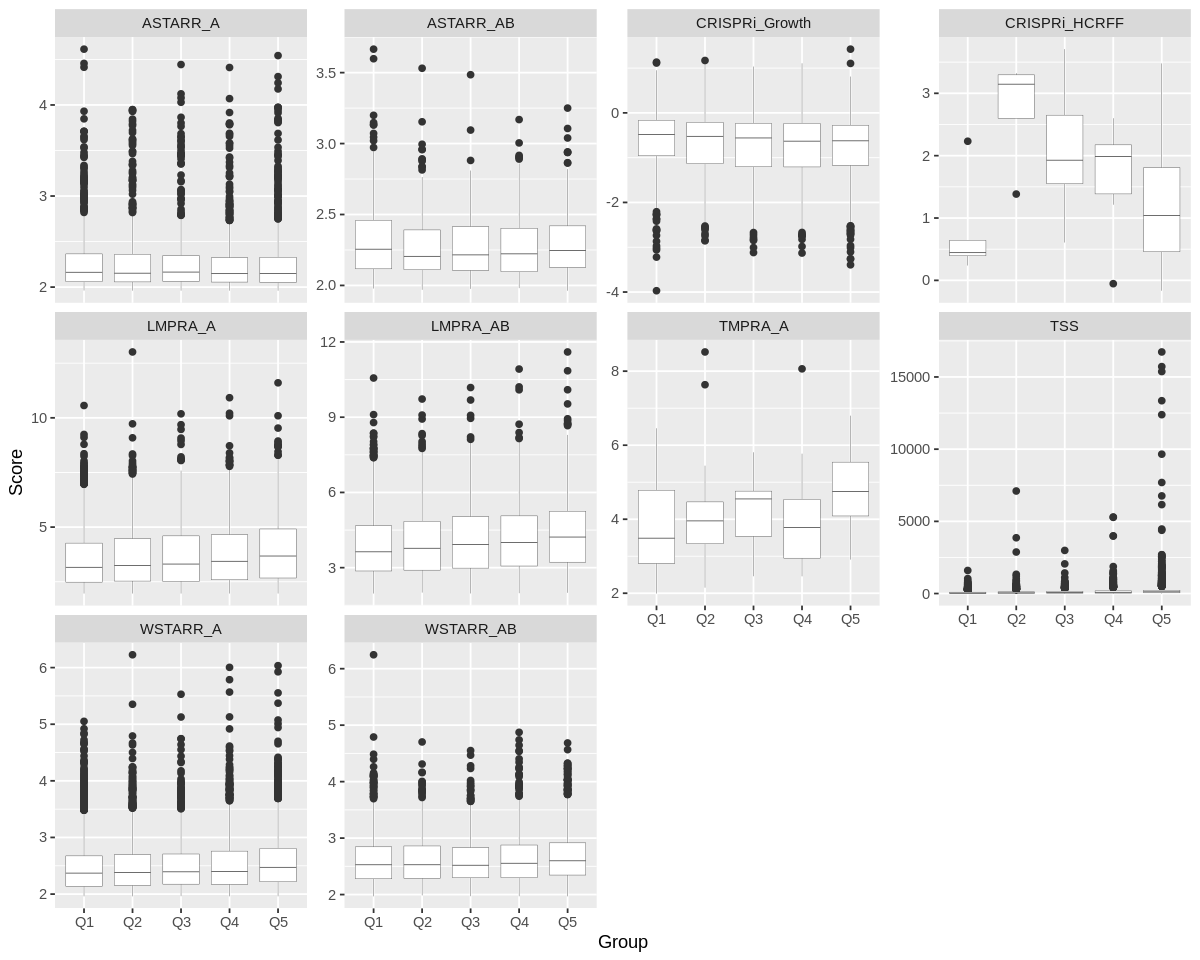

In [31]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot(size=0.1) +
    facet_wrap(~Label, scales = "free_y")
options(repr.plot.height=8, repr.plot.width=10)
print(gpt)